<h1>Imports and API setups<h1>

In [2]:
from __future__ import print_function    # (at top of module)
import warnings
#warnings.filterwarnings('always')
from spotipy.oauth2 import SpotifyClientCredentials
import json
import spotipy
import time
import sys
import csv
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
% matplotlib inline
plt.rcParams['figure.figsize'] = [10, 10]
from matplotlib.pyplot import figure
import math
import seaborn as sns
import config

## Read data from CSV

In [3]:
# Read the data from the file
data = pd.read_csv('Data/data_500_entries_youtube.csv')
data.head()
#print("Number of entries in original data: " + str(len(data.index)))

,song_id,song_title,artist,popularity,energy,liveness,tempo,speechiness,acousticness,instrumentalness,time_signature,danceability,key,duration,loudness,valence,mode,youtube_view_count,youtube_video_title
0,spotify:track:5ygDXis42ncn6kYG14lEVG,Baby Shark,[Pinkfong],77,0.840,0.3410,115.062,0.2270,0.2450,0.000000,4,0.825,7,96333,-3.651,0.520,1,1956582159,Baby Shark Dance | Sing and Dance! | Animal So...
1,spotify:track:7fa9MBXhVfQ8P8Df9OEbD8,Girls Like You (feat. Cardi B),"[Maroon 5, Cardi B]",86,0.541,0.1300,124.959,0.0505,0.5680,0.000000,4,0.851,0,235545,-6.825,0.448,1,1300452389,Maroon 5 - Girls Like You ft. Cardi B
2,spotify:track:6De0lHrwBfPfrhorm9q1Xl,Me Rehúso,[Danny Ocean],83,0.804,0.0494,104.823,0.0677,0.0231,0.000000,4,0.744,1,205715,-6.327,0.426,1,1229501096,Danny Ocean - Me Rehúso (Official Audio)
3,spotify:track:1j6xOGusnyXq3l6IryKF3G,Déjala Que Vuelva (feat. Manuel Turizo),"[Piso 21, Manuel Turizo]",74,0.788,0.0753,170.019,0.0785,0.0482,0.000000,4,0.681,1,220117,-4.323,0.839,1,1216075058,Piso 21 - Déjala Que Vuelva (feat. Manuel Turi...
4,spotify:track:2ijef6ni2amuunRoKTlgww,Sin Pijama,"[Becky G, Natti Natasha]",90,0.745,0.1040,94.014,0.0464,0.3540,0.000029,4,0.791,11,188560,-3.695,0.820,0,1071141995,Becky G Natti Natasha - Sin Pijama (Video Ofic...


## Clean the data

In [4]:
data = data.drop_duplicates(subset=['song_id'], keep='first')
print("Number of entries in original data after cleaning: " + str(len(data.index)))

Number of entries in original data after cleaning: 570


In [5]:
data = data[data.popularity > 50]
print("Number of entries in original data after cleaning: " + str(len(data.index)))

Number of entries in original data after cleaning: 570


## Label the data according to threshold for plotting

In [6]:
# Label data according to a threshold for nicer plotting
from project_modules import *
labeled_data = label_data(data, 89)
data = labeled_data.copy()

Number of popular examples after thresholding :  55
Number of not popular examples after thresholding :  515


C:\Python27\lib\site-packages\sklearn\utils\fixes.py:313: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  _nan_object_mask = _nan_object_array != _nan_object_array


## Analyzing the data

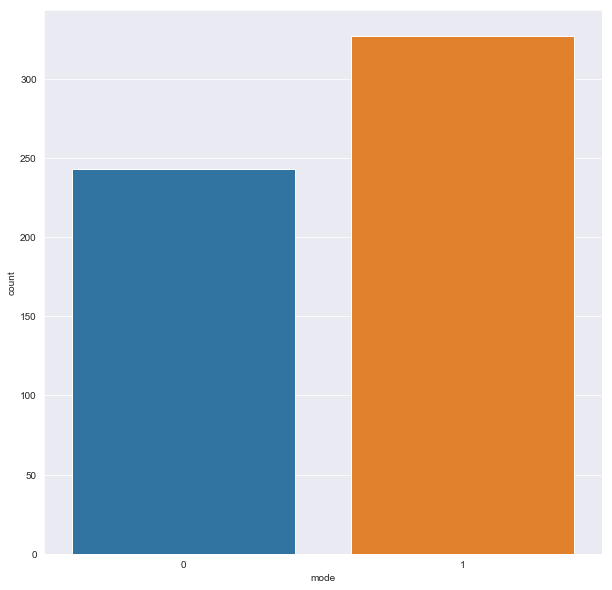

In [100]:
plt.figure(figsize=(10,10))
sns.countplot(x="mode", data=data)

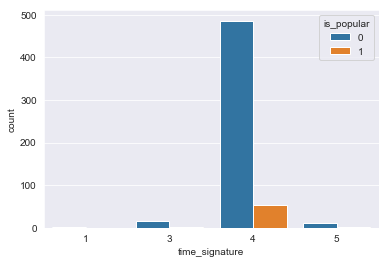

In [16]:
sns.countplot(x="time_signature", hue="is_popular", data=labeled_data)

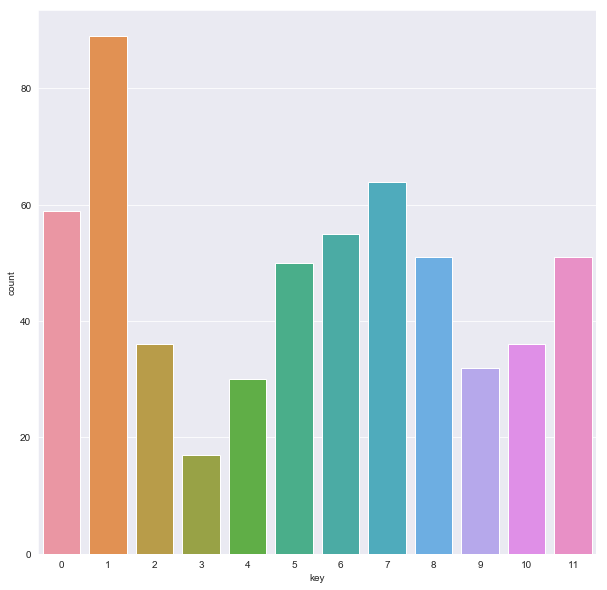

In [99]:
plt.figure(figsize=(10,10))
sns.countplot(x="key", data=data)

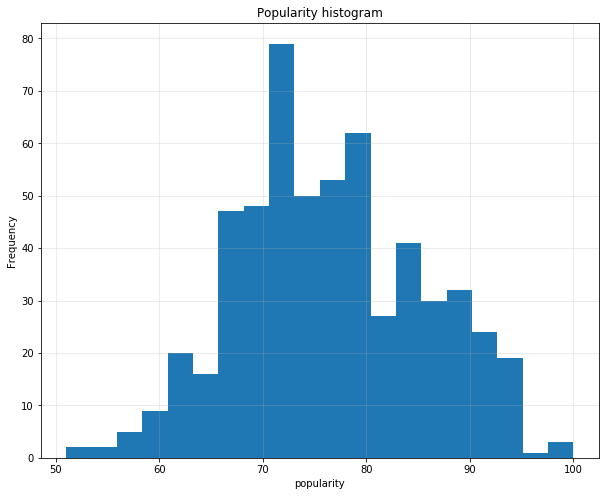

In [7]:
data['popularity'].plot.hist(bins=20, rwidth=10,figsize=(10,8), histtype="bar")
plt.xlabel('popularity')
plt.title("Popularity histogram")
plt.grid(alpha=0.3)

In [53]:
plt.figure(figsize=(10,10))
sns.set_style('darkgrid')
sns.distplot(data["valence"],bins=30,color='green', kde=False)

TypeError: distplot() got an unexpected keyword argument 'hue'

<Figure size 720x720 with 0 Axes>

Text(0.5,1,'Tempo and popularity')

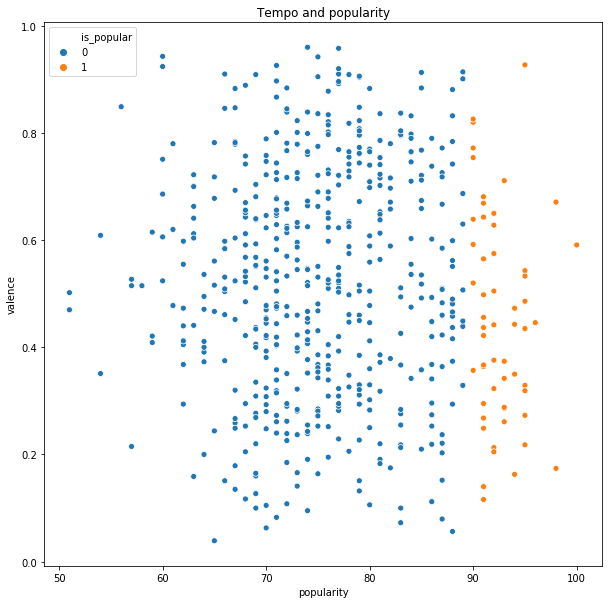

In [9]:
plt.figure(figsize=(10,10))
sns.scatterplot(x="popularity", y = "valence" , hue = "is_popular", data=labeled_data).set_title("Tempo and popularity")

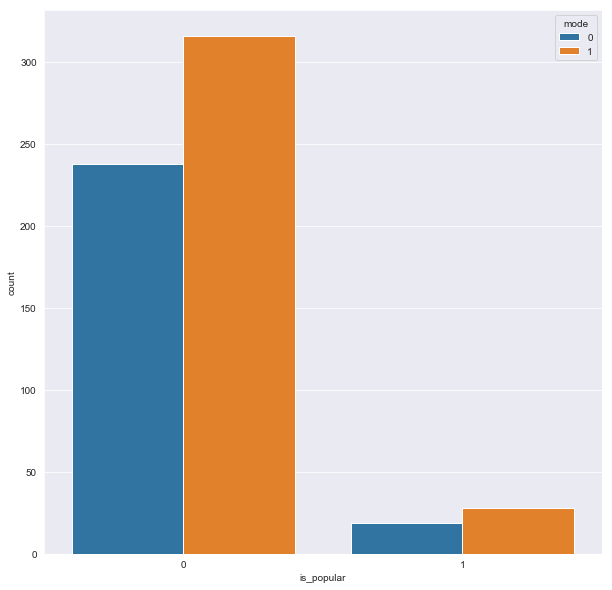

In [51]:
sns.countplot(x="is_popular", hue = "mode", data=labeled_data)

Text(0.5,1,'Instrumentalness and popularity')

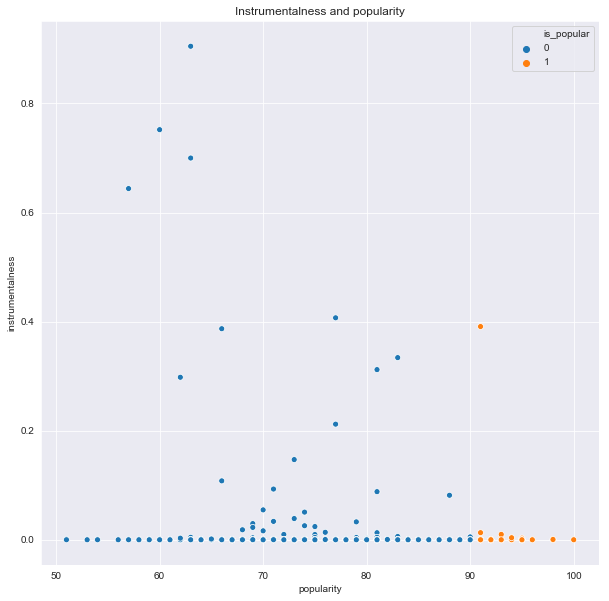

In [52]:
sns.scatterplot(x="popularity", y = "instrumentalness" , hue = "is_popular", data=labeled_data).set_title("Instrumentalness and popularity")

Text(0.5,1,'Loudness and popularity')

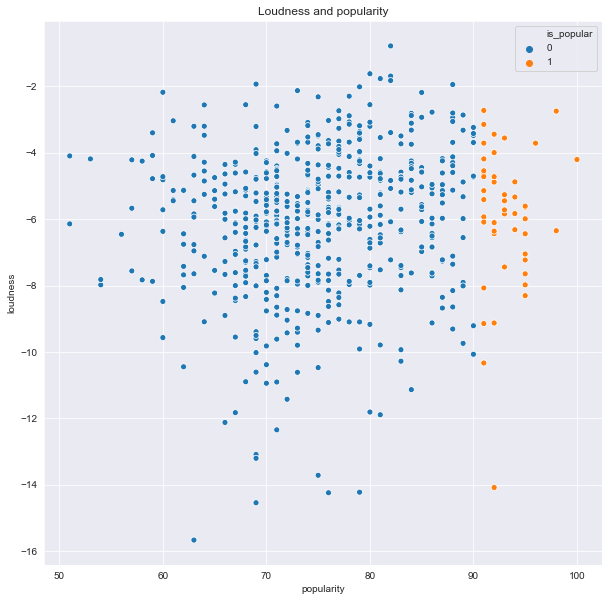

In [53]:
sns.scatterplot(x="popularity", y = "loudness" , hue = "is_popular", data=labeled_data).set_title("Loudness and popularity")

In [91]:
# X will be our examples and y will be our labels
COLUMNS_TO_SCALE = ["energy", "liveness", "tempo", 
                    "speechiness", "acousticness", "instrumentalness", 
                    "time_signature", "danceability", "key", 
                    "duration", "loudness", "valence", "mode"]
data.drop(['song_id', 'song_title', 'artist', 'popularity', 'youtube_view_count', 'youtube_video_title'], 1, inplace=True) 
X = data.drop('is_popular', axis=1)
y = data['is_popular']

from sklearn import preprocessing
scaler2 = preprocessing.StandardScaler()
scaled_X = pd.DataFrame(scaler2.fit_transform(X), columns=COLUMNS_TO_SCALE)

In [92]:
print(scaled_X)

       energy  liveness     tempo  speechiness  acousticness  \
0    1.134405  1.053202 -0.263119     0.898741     -0.028242   
1   -0.725307 -0.307878  0.073383    -0.747680      1.378645   
2    0.910493 -0.827797 -0.611250    -0.587236     -0.994769   
3    0.810977 -0.660726  1.605444    -0.486492     -0.885441   
4    0.543526 -0.475594 -0.978761    -0.785926      0.446528   
5   -1.297527  2.414282 -1.551499    -0.201983     -0.950777   
6   -0.625791 -0.564612 -1.283779    -0.668391      1.931817   
7    0.754999  2.956133 -0.978455    -0.312055     -0.858872   
8    0.425351  1.253171  0.450415    -0.015419     -0.664173   
9    0.916713  0.163017 -0.979815    -0.517275      0.276656   
10  -0.277484 -0.353032 -1.624464     0.133831      0.028382   
11   0.879394 -0.553001 -0.978115    -0.404404     -0.280872   
12  -1.732911 -0.462692 -0.601560    -0.902528      2.654861   
13   1.314778  2.304621 -0.027360    -0.419329      1.565940   
14   0.412911 -0.423989 -0.087235    -0.

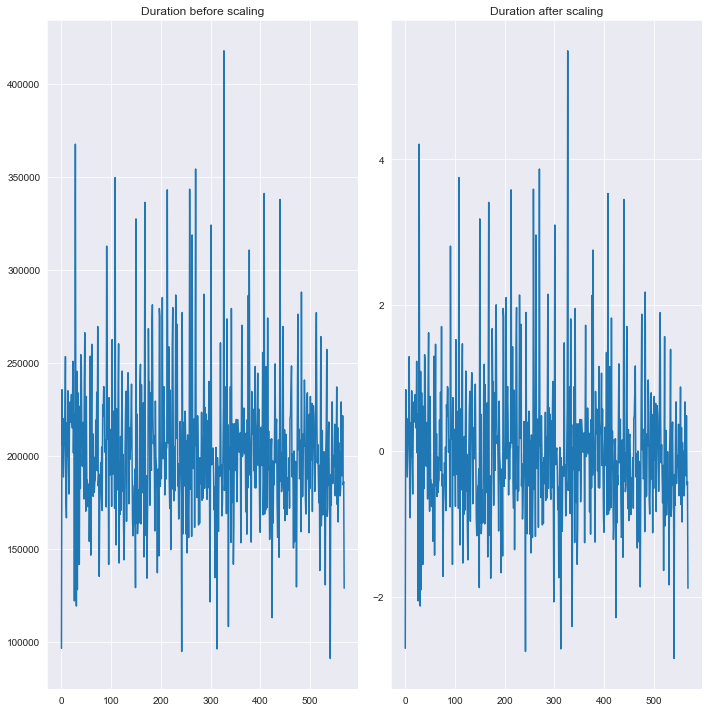

In [97]:



#Plots to see the difference before/after scaling
plt.subplot(1,2,1)
plt.plot(X['duration'])
plt.title("Duration before scaling")

plt.subplot(1,2,2)
plt.plot(scaled_X['duration'])
plt.title("Duration after scaling")
plt.tight_layout()
plt.show()
